<a href="https://colab.research.google.com/github/Ignacio-Ibarra/TA-TE-TI-simulation/blob/master/TA_TE_TI_suerte_para_mi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

El tres en línea, también conocido como Ceros y Cruces, tres en raya (España, Ecuador y Bolivia), Michi (en Perú), Triqui (en Colombia), Cuadritos, juego del gato, Gato (en Chile, Costa Rica y México), Tatetí (en Argentina, Paraguay y Uruguay), Totito (en Guatemala), Triqui traka, Equis Cero, Tic-Tac-Toe (en Estados Unidos), o la vieja (en Venezuela), es un juego de lápiz y papel entre dos jugadores: O y X, que marcan los espacios de un tablero de 3×3 alternadamente.

Los jugadores no tardan en descubrir que el juego perfecto termina en empate sin importar con qué juega el primer jugador. Normalmente son los niños pequeños los que juegan al tres en raya: cuando ya han descubierto una estrategia imbatible se pasan a juegos más sofisticados, como el de puntos y cajas.

La misma simplicidad del juego de tres en raya lo hacen ideal como herramienta pedagógica para enseñar los conceptos de teoría de juegos y la rama de inteligencia artificial que se encarga de la búsqueda de árboles de juego.

# Objetivo

Si jugamos al ta-te-ti (en papel y lápiz) con una estrategia aleatoria, ubicamos alternadamente X y O en las casillas vacías, en cuántas movidas promedio gana X? 

Comienza X desde un tablero vacío; sólo contar las partidas que X gana, es decir, hace 3-en-línea y lo hace antes que O. Una vez que hay ta-te-ti, la partida se termina. 

In [76]:
import random 

In [77]:
def absolut_difference(lst,last_n):
  if len(lst)>last_n: 
    first = lst[-last_n:]
    last = lst[len(lst)-1]
    return ((first - last)**2)**0.5
  else:
    return 0.01


In [78]:
def cvariation(lst):
    mean = float(sum(lst)) / len(lst)
    variance = sum([((x - mean) ** 2) for x in lst]) / (len(lst)-1)
    stddev = variance ** 0.5
    return stddev / mean


In [79]:
def is_a_winner(lista): 
  if any([all(elem in lista for elem in [0,3,6]),
          all(elem in lista for elem in [1,4,7]),
          all(elem in lista for elem in [2,5,8]),
          all(elem in lista for elem in [0,1,2]),
          all(elem in lista for elem in [3,4,5]),
          all(elem in lista for elem in [6,7,8]),
          all(elem in lista for elem in [0,4,8]), 
          all(elem in lista for elem in [2,4,6])]) == True and (len(x)>2): 
    return True
  else:
    return False

In [100]:
#Simulación de N juegos. 

empate = 0
gana_x = 0
gana_o = 0.0
suma_x = 0.0
suma_o = 0.0
acumulado_x = []
acumulado_o = []
number_games = 1000000
for i in range(number_games): 
  
  #Este es mi tablero, cada nro es una posición
  tablero = list(range(9))

  #Selecciones de lugares para 'x' y 'o'
  x = []
  status_x = 'not a winner'
  o = []
  status_o = 'not a winner'
  match = 'not finished'

  while match != 'finished':
    if len(o) == 4: 
        match = 'finished'
    
    selection_x = random.choice(tablero)
    x.append(selection_x)
    
    if is_a_winner(x):
        
        status_x = 'winner'
        
        match = 'finished'
    if len(x) == 5: 
      match = 'finished'
    
    if match != 'finished': 
      
      tablero_nuevo = []
      for item in tablero: 
        if item not in x and item not in o: 
          tablero_nuevo.append(item)
      tablero = tablero_nuevo
      selection_o = random.choice(tablero)
      o.append(selection_o)
      
      if is_a_winner(o):
          
          status_o='winner'
          
          match = 'finished'  
      
      tablero_nuevo = []
      for item in tablero: 
        if item not in x and item not in o: 
          tablero_nuevo.append(item)
      tablero = tablero_nuevo

  if i>100 and cvariation(acumulado_x[-100:]) < 0.000001:
    print('Early Stopping on iteration nro {}'.format(i),'\n')
    print(acumulado_x[-10:])
    print('The Coefficient of Variation is ',cvariation(acumulado[-20:]))
    break
  
  if status_x == 'winner' and status_o == 'not a winner':
    gana_x += 1
    suma_x += len(x)
    average_x = suma_x / gana_x
    acumulado_x.append(average_x)
  elif status_x == 'not a winner' and status_o == 'winner':
     gana_o += 1
     suma_o += len(o)
     average_o = suma_o / gana_o
     acumulado_o.append(average_o)
  else:
     empate += 1
  

print('----'*75)
print('Number of games', i)
print('Percentage of times there is a draw:', round(100*empate/i,2)) 
print('Percentage of times where X wins:', round(100*gana_x/i,2), 'Length average:', average_x)
print('Percentage of times where O wins:', round(100*gana_o/i,2), 'Length average:', average_o)

Early Stopping on iteration nro 344737 

[4.222713293650794, 4.22271714922049, 4.222716044483685, 4.222719900001488, 4.222713835042955, 4.22271273033903, 4.222711625646062, 4.222710520964053, 4.222714376413634, 4.22271327172894]
The Coefficient of Variation is  0.0
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Number of games 344737
Percentage of times there is a draw: 12.66
Percentage of times where X wins: 58.48 Length average: 4.22271327172894
Percentage of times where O wins: 28.86 Length average: 3.6936754920290293


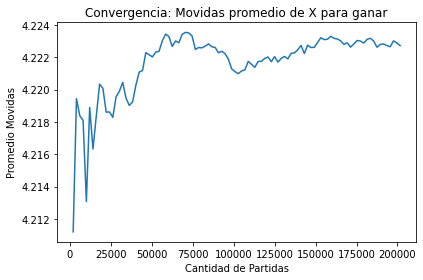

In [120]:
import matplotlib.pyplot as plt
%matplotlib inline

points = 100
bin_x = gana_x//points
indixes_x = list(range(bin_x, gana_x, bin_x))

values_x = []
for i in indixes_x:
  value_x = acumulado_x[i]
  values_x.append(value_x)

plt.plot(indixes_x,values_x)
plt.title('Convergencia: Movidas promedio de X para ganar')
plt.xlabel('Cantidad de Partidas')
plt.ylabel('Promedio Movidas')
plt.tight_layout()
# plt.savefig('convergencia.png',dpi=200)
# from google.colab import files
# files.download('convergencia.png')

In [104]:
bin_o

994